# Radio Mini Course Assignment 2
## Ariel Amaral

I'm going to do this in 1D because it is probably easier to interperate, I can always go back and try the 2D version if I need to.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [2]:
#A modern computer can do an FFT on a 10000 element array in no time at all
#but we need the array to be 10001 to make it symmetric 
#(fixes the weird phase errors Shannon and I were stuck on for ages last weekend!)
arraylen = 10001 
sky1D = np.zeros(arraylen)

#putting a 1 somewhere totally random in the list
rand1=np.random.randint(0,40)
sky1D[rand1]=1

In [3]:
weights = np.zeros(len(sky1D)) + 1. #perfect observation

The function in the cell below *interferometer1D()* generates the steps required in the "Set Up" part of this assignment.  It takes a 1D sky array and computes the visibilities, and using weights, computes the synthesized beam, and then the resulting sky image. 

The code outputs plots.  When prompted it can output the visibilities (though I only end up using this in Part 5 an 6).
More commonly I output the same plot structure for almost each question - because I felt like it was a good representation to see what exactly changing in every step for different parts of the interferometer. If you are reading this assignment and find that there are too many plots and cant find where I try to answer the questions you can always set plots=False in the function, and they will not plot.

The plot structure can been seen in the image below.  I tried to make it kind of intuitive, like the input sky at the top left, and the output sky image at the bottom right.  The arrows represent the order of successive steps applied in the interferometer1D code.

<img src="interferometry1D_plot.png" width="300" height="150">

In [4]:
def interferometer1D(sky1D,weights,noise_lvl,vis_plot,phi_err,plots):
    vis1D = np.fft.fft(sky1D)
    freq = np.fft.fftfreq(len(sky1D))
    
    #creating Gaussian noise
    
    noise1 = np.random.normal(0., noise_lvl, int(arraylen/2.)) +np.random.normal(0., noise_lvl, int(arraylen/2.))*1j

    noise2 = np.flip(noise1)

    noise_array = np.concatenate((noise2,np.array([0]),noise1))
        
    #phi_err_1 = np.linspace(-phi_err,0,int(arraylen/2.))
    #phi_err_2 = np.linspace(0,phi_err,int(arraylen/2.)) #to make it hermitian

    #phi_err_arr = np.radians(np.concatenate((phi_err_1,np.array([0]),phi_err_2))) #probably want this in rad
    
    phi_err_1 = np.linspace(-phi_err,phi_err,int(arraylen/2.))
    phi_err_2 = np.linspace(phi_err,-phi_err,int(arraylen/2.)) #to make it hermitian
    
    phi_err_arr = np.radians(np.concatenate((phi_err_1,np.array([10]),phi_err_2))) #probably want this in rad
    
    #adding the noise to the visibilities:
    
    vis1D = np.fft.fft(sky1D)*np.exp(1j*phi_err_arr) + noise_array
    
    #defining phase and amplitude
    phase = np.angle(vis1D)*np.exp(1j*phi_err_arr)
    amp = np.sqrt(np.real(vis1D)**2.+np.imag(vis1D)**2.)
    
    
    if vis_plot == True:
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(7,5))
        plt.tight_layout()
        plt.title("Visibilities")
        plt.plot(freq,vis1D,'.',alpha=0.8,linewidth = 3,color='#c51b8a')
        plt.grid()
        plt.grid()
        plt.tick_params(labelsize=20)
        plt.show()
    
    product = vis1D*weights
    image1D = np.fft.ifft(product)
    synth_beam = np.fft.ifft(weights)
    
    if plots == True:
        #plotting the amplitude and phase of the visibilite
        plt.rc('text', usetex=True)
        plt.rc('font', family='serif')
        plt.figure(figsize=(16,19))
        plt.tight_layout()
        #plt.suptitle("Simulated 1D Interferometer",fontsize=30)

        plt.subplot(321)
        plt.plot(sky1D,linewidth=4,c='#01665e')
        plt.title('Sky',fontsize=20)
        plt.xlabel('Sky Index',fontsize=15)
        plt.grid()
        plt.tick_params(labelsize=20)

        plt.subplot(322)
        plt.title("Visibility Amplitude",fontsize=20)
        plt.plot(freq,amp,linewidth = 3, alpha=0.9,c='#c51b7d')
        plt.xlabel(r'Frequency',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.grid()

        plt.subplot(323)
        plt.title("Visibility Phase",fontsize=20)
        plt.plot(freq,phase,'.',c='#4d9221')
        plt.xlabel(r'Frequency',fontsize=15)
        #plt.legend(fontsize=20)
        plt.tick_params(labelsize=20)
        plt.grid()

        #PLOTTING THE WEIGHT FUNCTION
        plt.subplot(324)
        plt.title("Weight Function",fontsize=20)
        plt.plot(freq,weights,'.',linewidth=4,c='#b2182b')
        plt.xlabel('Frequency',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.grid()

        #plotting the amplitude and phase of the visibilites
        plt.subplot(325)
        plt.title("Synthesized Beam (freq axis zoom in)",fontsize=20)
        plt.plot(freq,synth_beam,color='#542788',linewidth=2,alpha=0.9)
        plt.xlabel(r'Frequency',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.xlim((-0.005,0.005))
        plt.grid()

        plt.subplot(326)
        plt.plot(image1D,linewidth=4,c='#b35806',alpha=0.9)
        plt.title(r'Final Image',fontsize=20)
        plt.xlabel(r'Sky Index',fontsize=15)
        plt.tick_params(labelsize=20)
        plt.grid()

        plt.show()
    return vis1D, phase, amp, image1D, synth_beam, freq


# NOW I WILL PUT ONE ONE PLOTTING FUNCTIONS

# Part 1

### First test case: delta function at the center of the image, with perfect sampling. How does the Fourier transform compare to the theoretical expectation?

In [5]:
sky1D_a = np.zeros(arraylen)

sky1D_a[int(np.around(arraylen/2.))] = 1.
weights_a = weights #perfect weights

no_noise = 0.


/Users/arielamaral/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


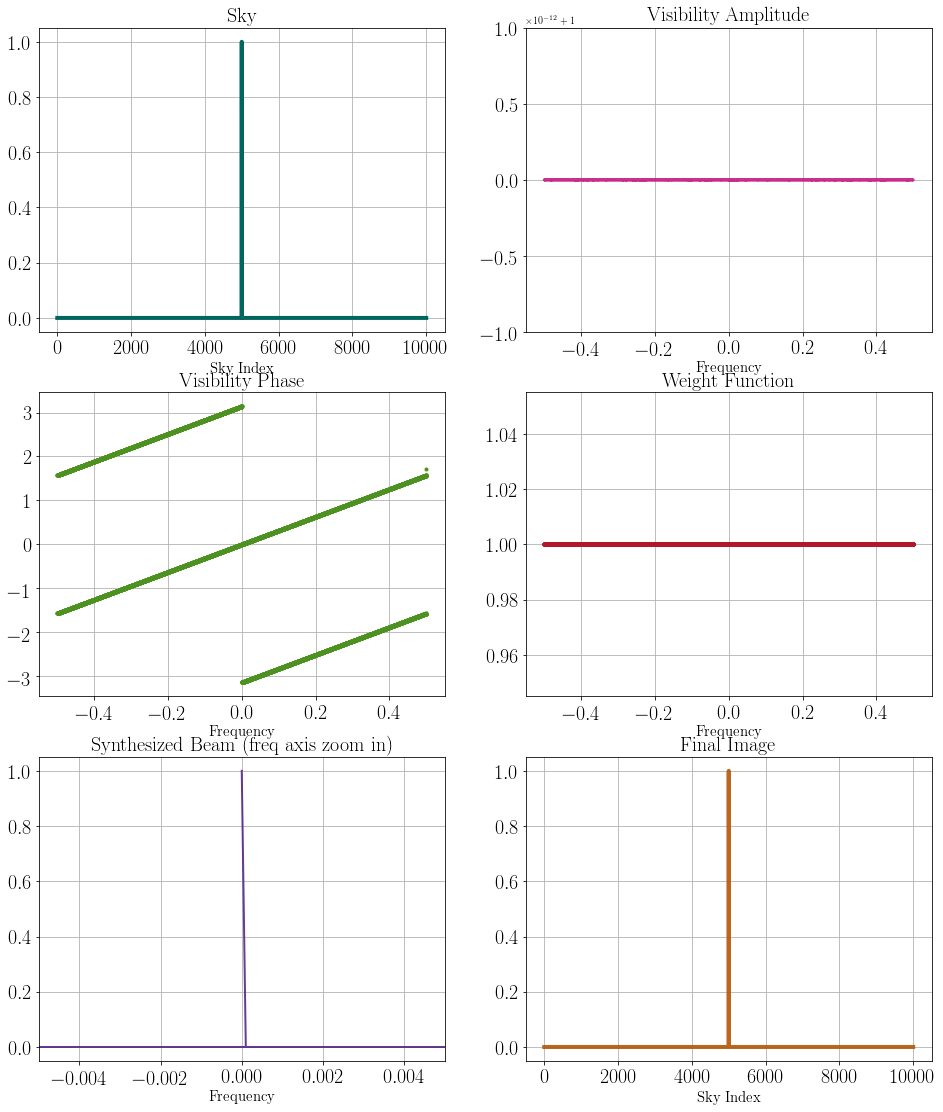

In [6]:
vis1D_a, phase_a, amp_a, image1D_a, synth_beam_a, _ = interferometer1D(sky1D_a,weights_a,no_noise,False,0.,True)

The following is from the Fourier transform theory:

$$ 
\delta(t) \rightarrow 1
$$

From the lecture slides: "Delta function has equal signal on all frequencies. OR: constant signal corresponds to zero frequency." 

This always reminds me of applications from things like quantum, like you can't know all the information in both domains.  If you have all of the info in one domain - it wil be spread out in the other.

We see a delta function in our sky domain, which corresponds to a flat amplitude in the fourier domain (amplitude).

# Part 2

### Shifted delta function: as with the above example, but move the delta function a few pixels in some direction (again, perfect uniform sampling). How does this change things, and does it match Fourier transform theory? Play with moving the delta function by different amounts and in different directions. Any thoughts about what this implies for sources very far from the center of an observation?

In [7]:
sky1D_b = np.zeros(arraylen)

sky1D_b[int(np.around(arraylen/2.))+1] = 1.
weights_b = weights #perfect weights

/Users/arielamaral/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


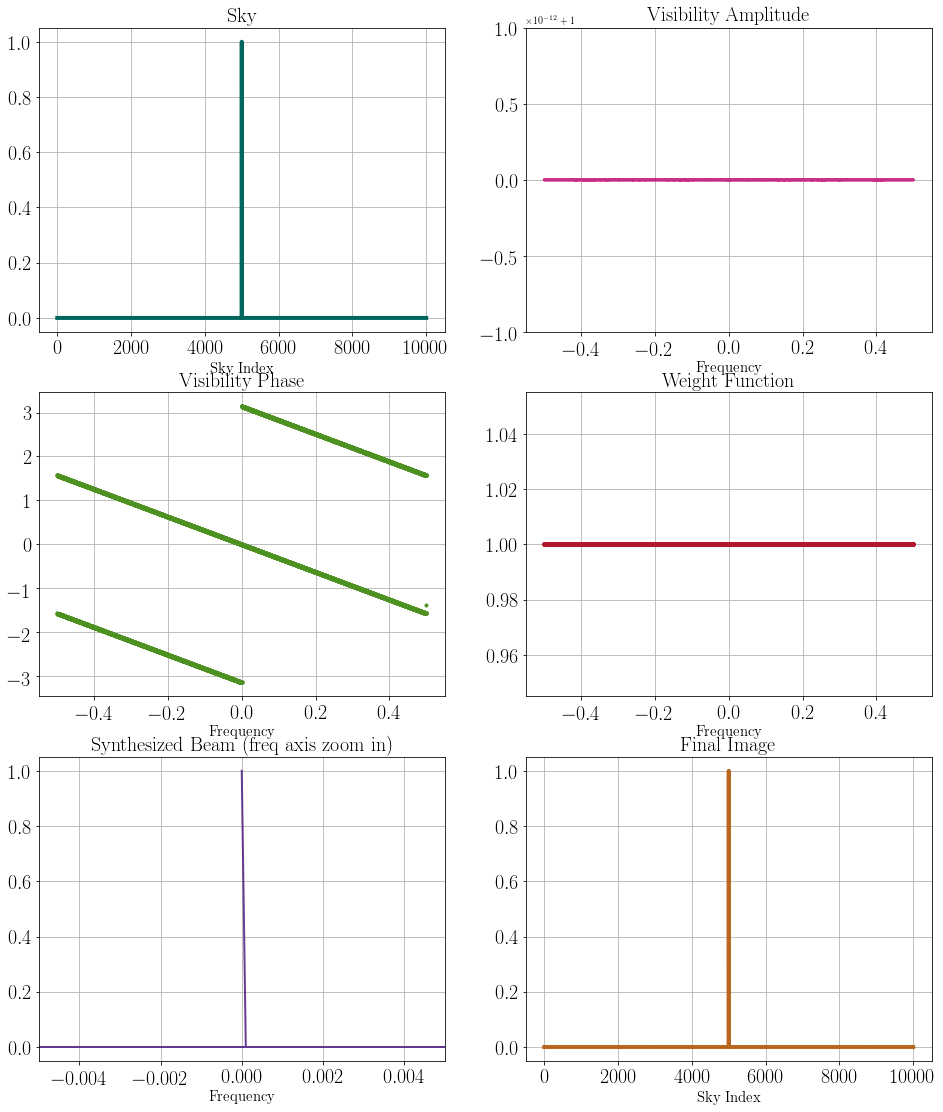

In [8]:
vis1D_b, phase_b, amp_b, image1D_b, synth_beam_b, _ = interferometer1D(sky1D_b,weights_b,no_noise,False,0.,True)

### Move the delta function a few pixels in some direction (again, perfect uniform sampling). How does this change things, and does it match Fourier transform theory? 

Here nothing has changed aside from the phase of the visibility.  The slope of the phase lines have inversed.

The following is from the "Shift Theorem" from Fourier transform theory:

$$ 
x(t - \tau) \rightarrow X(\omega) e^{i 2 \pi \omega \tau}
$$

So you can see if you shift your function in one domain (here the sky domain), this will correspond to a change in the phase in the Fourier domain (here the UV plane).  This is exactly what we see, the phase is the only thing that changes between the plots.


In [9]:
sky1D_b = np.zeros(arraylen)

sky1D_b[int(np.around(arraylen/2.))+3000] = 1.
weights_b = weights #perfect weights

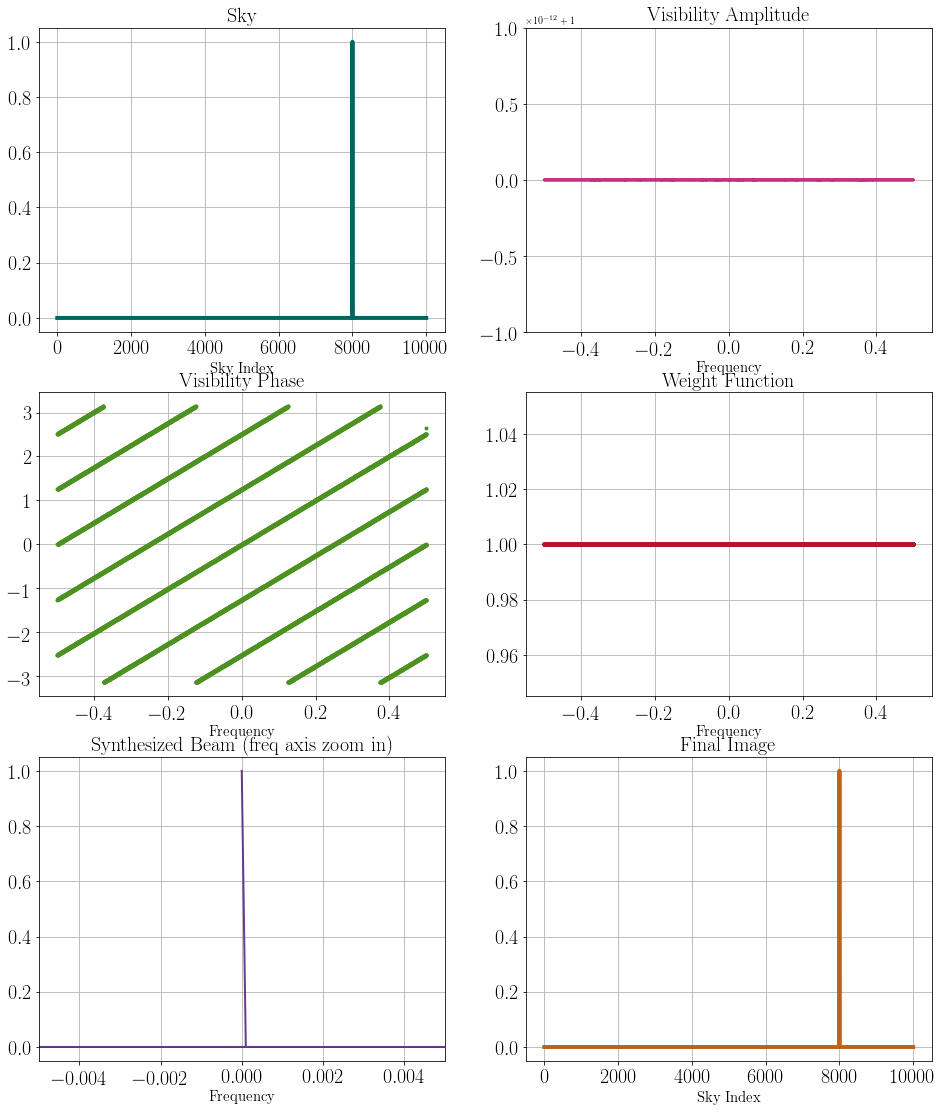

In [10]:
vis1D_b, phase_b, amp_b, image1D_b, synth_beam_b, freq = interferometer1D(sky1D_b,weights_b,no_noise,False,0.,True)

### Play with moving the delta function by different amounts and in different directions. Any thoughts about what this implies for sources very far from the center of an observation?

After playing with shifting the delta further and further away from the phase center, we can see phase became less certain,and when I say the less certain the phase became we could see that the phase space starting filling out more and more so like the phase becomes less defined.

This means that sources at the edges of observing fields will have less reliable locations on the sky (since  phase is directly related to the location on the sky) .... which i’m pretty sure that’s true with most radio observations, that the edges are kinda garbage.



# PART 3 - weighting
### Single delta-function source, with some limited sampling. Put in a delta function source somewhere (position shouldn't matter). Change the weight function to remove some parts of the ​u,v​ plane. Try removing long baselines (high frequencies) and see how that affects the resulting synthesized beam. Same with removing short baselines, or the mid-length baselines. Try a very sparse measurement (very few parts sampled). Make a few comments on the behaviour of the synthesized beam.

#### First I will remove the short baselines, these correspond to the middle area of the weights.

In [11]:
#Try removing long baselines (high frequencies)
sky1D_3 = np.zeros(arraylen)

sky1D_3[int(np.around(arraylen/2.))] = 1.


In [12]:
weights_3 = np.zeros(len(sky1D_3))

weights_3[int(np.around(arraylen/4.)):int(np.around(3.*arraylen/4.))] = 1.

norm_const = np.average(weights_3)

weights_3 = weights_3/norm_const

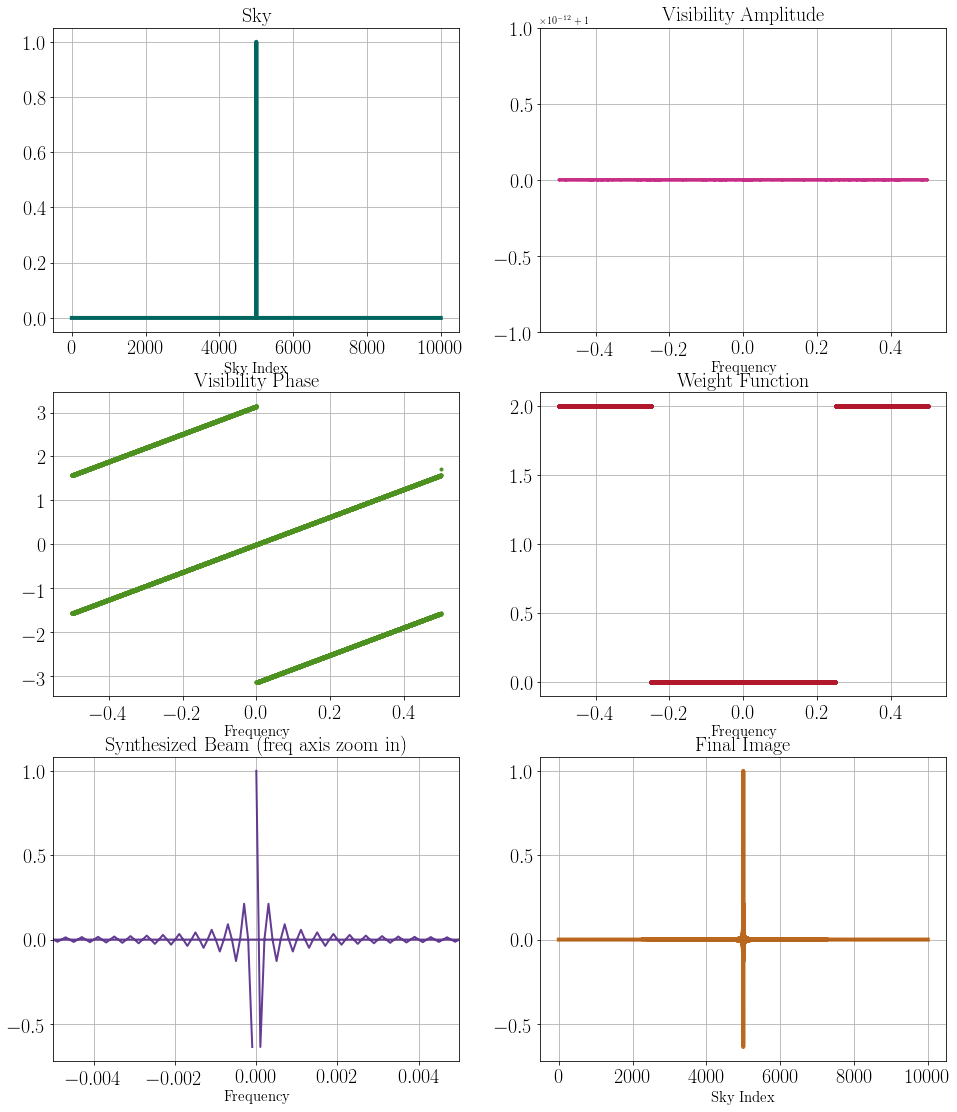

In [13]:
vis1D_3a, phase_3a, amp_3a, image1D_3a, synth_beam_3a, _ = interferometer1D(sky1D_3,weights_3,no_noise,False,0.,True)

#### Removing the long baselines: Corresponding to high frequencies

In [14]:
weights_3b = np.zeros(len(sky1D_3))

weights_3b[:int(np.around(arraylen/4.))] = 1.

weights_3b[int(np.around(3.*arraylen/4.)):] = 1.

norm_constb = np.average(weights_3b)

weights_3b = weights_3b/norm_constb

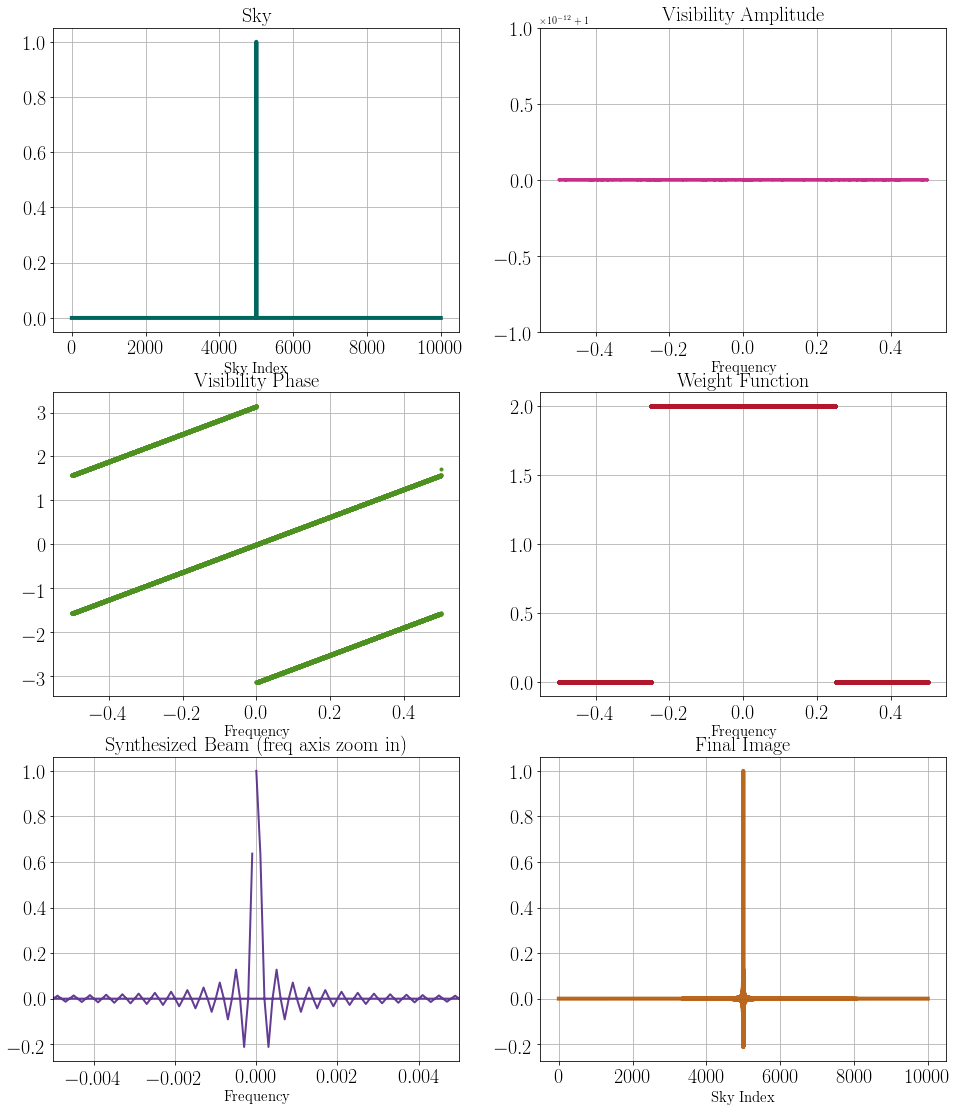

In [15]:
vis1D_3b, phase_3b, amp_3b, image1D_3b, synth_beam_3b, _ = interferometer1D(sky1D_3,weights_3b,no_noise,False,0.,True)

### Removing mid length baselines

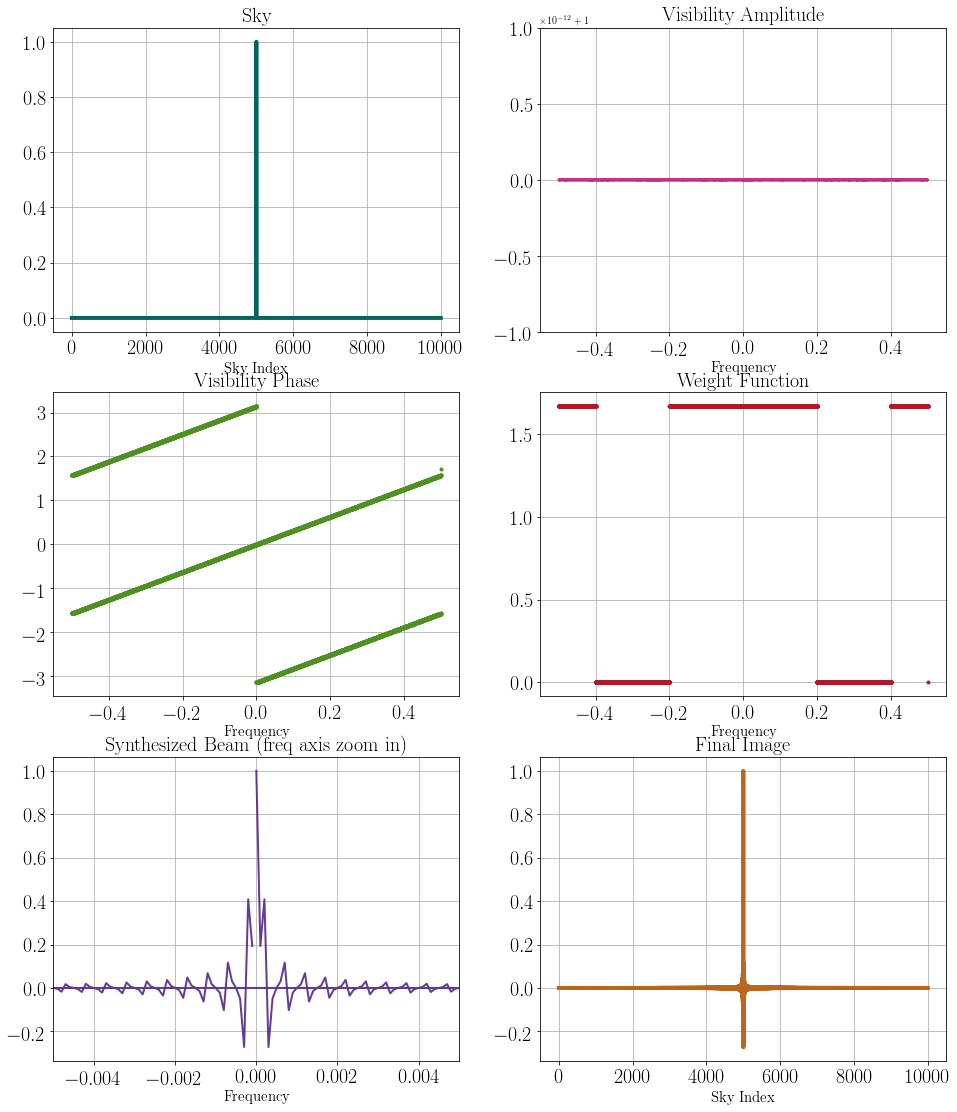

In [16]:
weights_3d_half = np.ones(int(arraylen/2.))
weights_3d_half[2000:4000] = 0.

weights_3d = np.concatenate((weights_3d_half,np.array([0]),np.flip(weights_3d_half)))

norm_const3d = np.average(weights_3d)

weights_3d = weights_3d/norm_const3d

#plt.figure(figsize=(7,5))
#plt.plot(weights_3d,'.')
#plt.show()

vis1D_3d, phase_3d, amp_3d, image1D_3d, synth_beam_3d, freq = interferometer1D(sky1D_3,weights_3d,no_noise,False,0.,True)

### Sparsely sampled weight function

Here I am basically just selecting random locations within the UV plane (frequency plane) to be covered.  To do this I set an array of zero weights the length of half of the total sky array, I then pick a random number to represent how many 1s the weigh array will have).  Then I assign that number of 1s in the zero array, at random locations.  Then I weight it to make sure 
I then flip the array produced and concatenate it with the non-flipped array to get an array that is symmetric about the midway.

[2137]


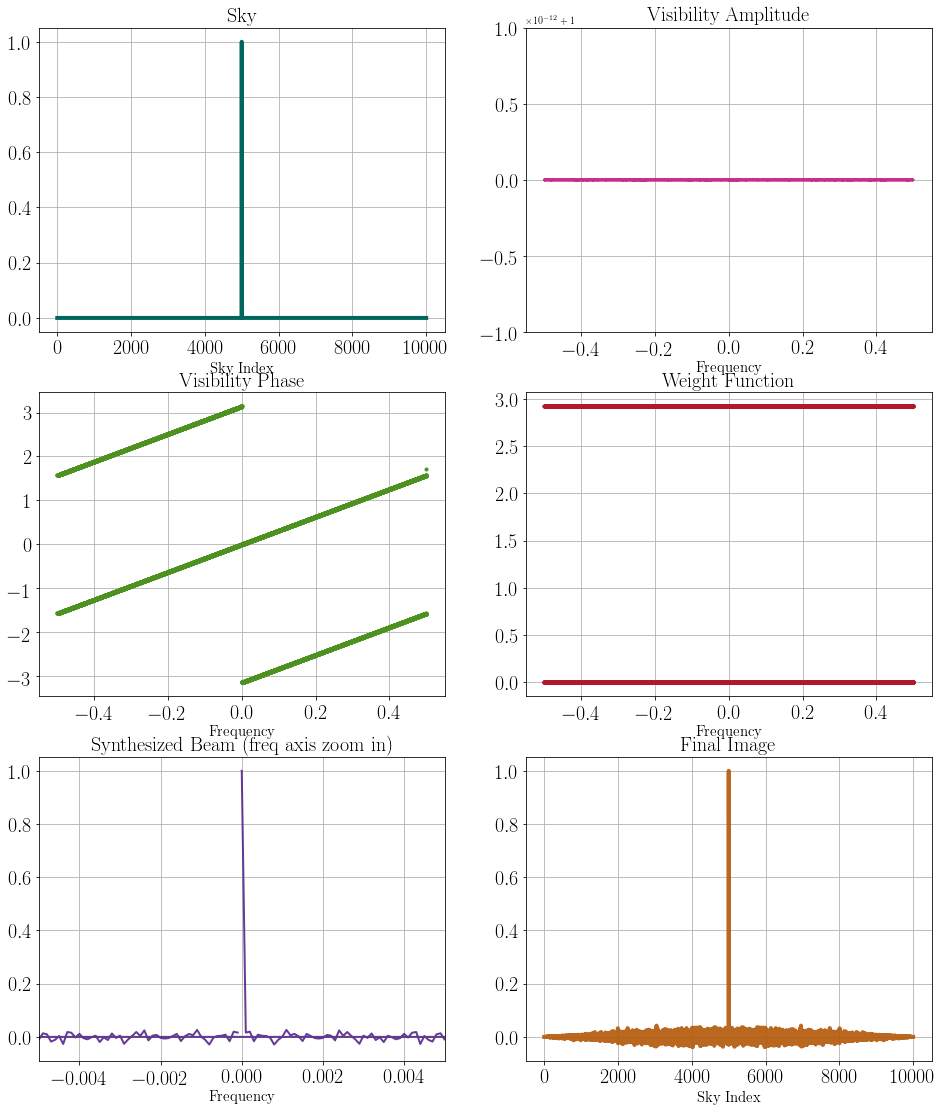

In [17]:
weights_3c_half = np.zeros(int(arraylen/2.))
num_ones = np.random.randint(0,int(arraylen/4.),1)
print(num_ones)
idx = np.random.randint(0,int(arraylen/2.),num_ones)
weights_3c_half[idx]=1.

weights_3c = np.concatenate((weights_3c_half,np.array([0]),np.flip(weights_3c_half)))

norm_const3c = np.average(weights_3c)

weights_3c = weights_3c/norm_const3c

#plt.figure(figsize=(7,5))
#plt.plot(weights_3c,'.')
#plt.show()

vis1D_3c, phase_3c, amp_3c, image1D_3c, synth_beam_3c, _ = interferometer1D(sky1D_3,weights_3c,no_noise,False,0.,True)

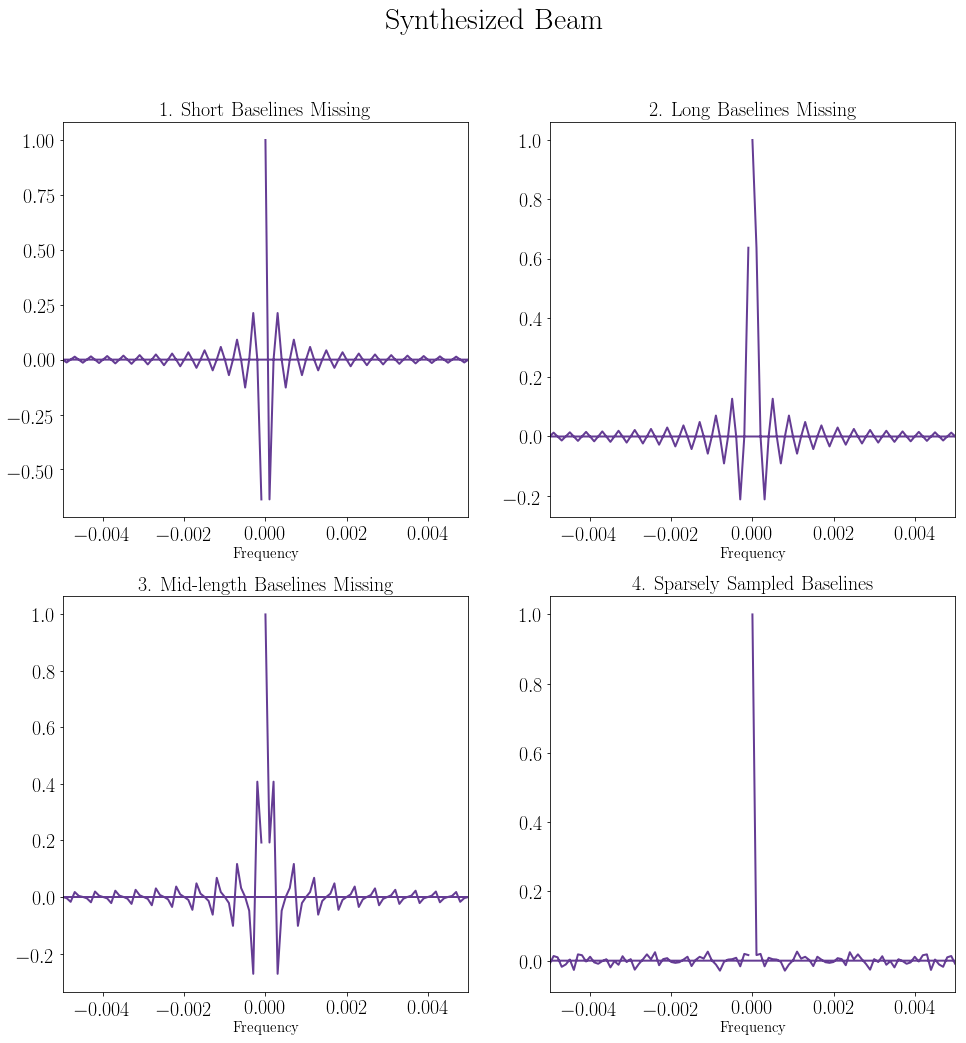

In [18]:
#plots of only the synthesized beams
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(16,16))
plt.tight_layout()
plt.suptitle("Synthesized Beam",fontsize=30)

plt.subplot(221)
plt.title("1. Short Baselines Missing",fontsize=20)
plt.plot(freq,synth_beam_3a,color='#542788',linewidth=2,alpha=0.9)
plt.xlabel(r'Frequency',fontsize=15)
plt.tick_params(labelsize=20)
plt.xlim((-0.005,0.005))

plt.subplot(222)
plt.title("2. Long Baselines Missing",fontsize=20)
plt.plot(freq,synth_beam_3b,color='#542788',linewidth=2,alpha=0.9)
plt.xlabel(r'Frequency',fontsize=15)
plt.tick_params(labelsize=20)
plt.xlim((-0.005,0.005))

plt.subplot(223)
plt.title("3. Mid-length Baselines Missing",fontsize=20)
plt.plot(freq,synth_beam_3d,color='#542788',linewidth=2,alpha=0.9)
plt.xlabel(r'Frequency',fontsize=15)
plt.tick_params(labelsize=20)
plt.xlim((-0.005,0.005))

plt.subplot(224)
plt.title("4. Sparsely Sampled Baselines",fontsize=20)
plt.plot(freq,synth_beam_3c,color='#542788',linewidth=2,alpha=0.9)
plt.xlabel(r'Frequency',fontsize=15)
plt.tick_params(labelsize=20)
plt.xlim((-0.005,0.005))

plt.show()

### Make a few comments on the behaviour of the synthesized beam.

### Short Baselines Missing
- Removing the short baselines looks to give the synthesizes beam a sync function like behaviour (when zoomed in super far). 

### Long Baselines Missing
- The synthesized beam when long baselines are missing also gives a sync-like function. The difference between losing long baselines vs. short baselines is that it looks like losing short baselines gives finer spaced variations to the sync-like behaviour from that of the long baselines.


### Medium Baselines Missing

- The synthesized beam for the medium baselines missing in the weight function seemed to add more of a slope and weird curvy looking structure to the "ups and downs" of the sync-like behaviour of the synthesized beam.

### Sparsely Sampled

- The synthesized beam for this sparsely sampled weight function (meaning a sparsely sampled UV plane) lead to a very noisy synthesized beam.  This makes sense because the weights are "noisy" and have no structure to them aside from them being symmetric about the phase center!

# Part 4 - Extended Sources

### Let's look at extended sources now. Put a top-hat function in your image, and play with the weighting again as before. How do the visibilities look, and how do they change as a function of the width of the tophat (and why?)? How does the image of the top-hat look depending on what information is present/missing?

In [19]:
#Try removing long baselines (high frequencies)
sky1D_4 = np.zeros(arraylen)

sky1D_4[int(np.around(1*arraylen/4.)):int(np.around(1*arraylen/2.))] = 1.

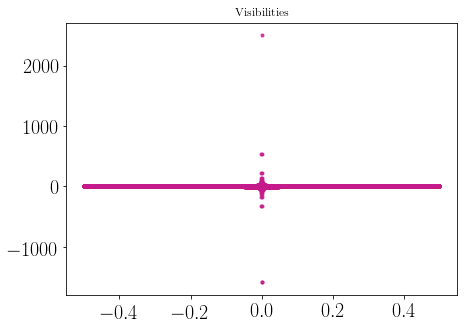

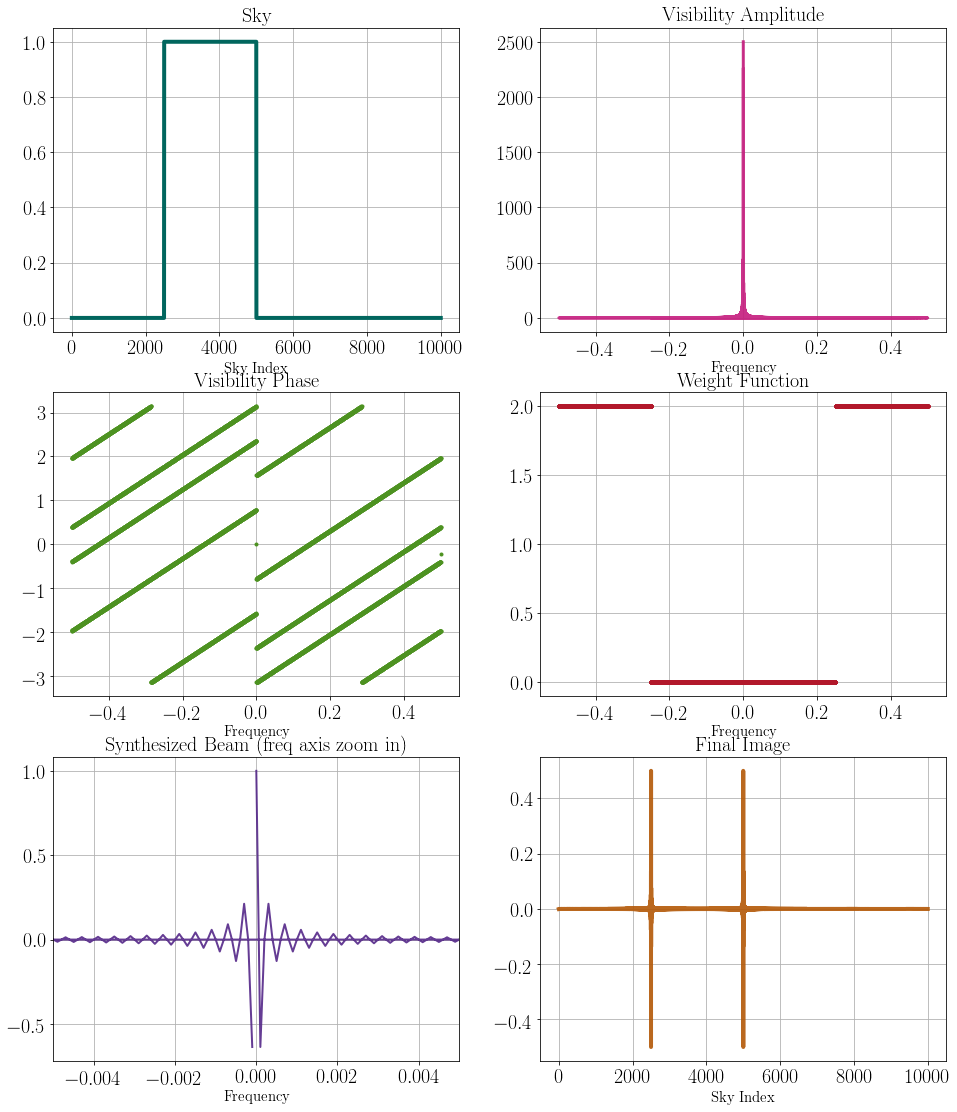

In [20]:
vis1D_4, phase_4, amp_4, image1D_4, synth_beam_4,freq = interferometer1D(sky1D_4,weights_3,no_noise,True,0.,True)

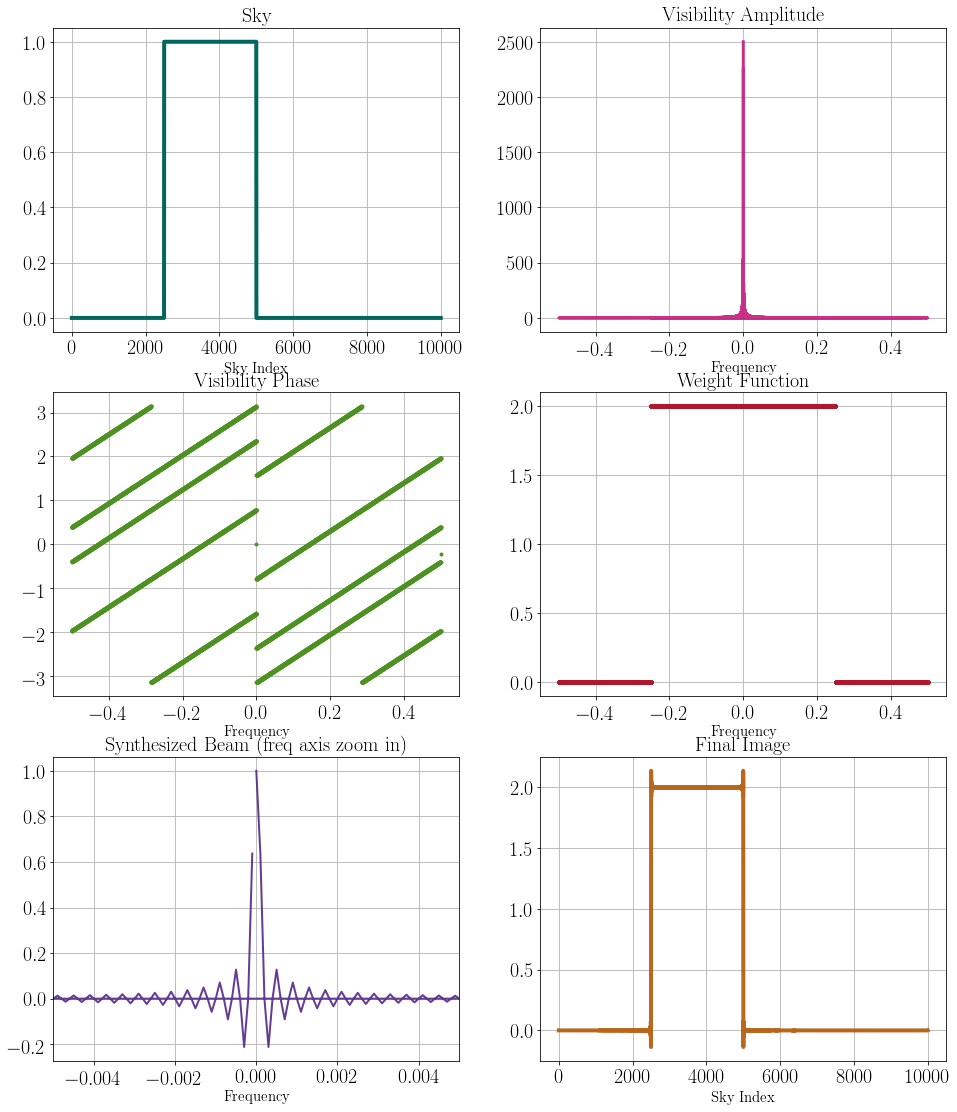

In [21]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3,freq = interferometer1D(sky1D_4,weights_3b,no_noise,False,0.,True)

### Now changing the width of the tophat to a fatter tophat!

In [22]:
#Try removing long baselines (high frequencies)
sky1D_4b = np.zeros(arraylen)

sky1D_4b[int(np.around(1*arraylen/4.)):int(np.around(3*arraylen/4.))] = 1.


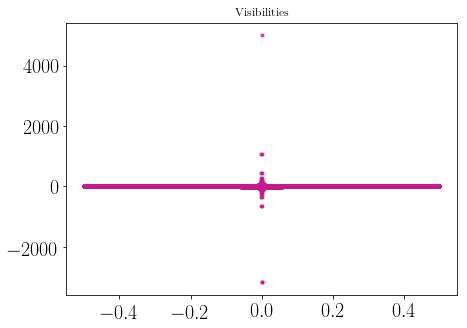

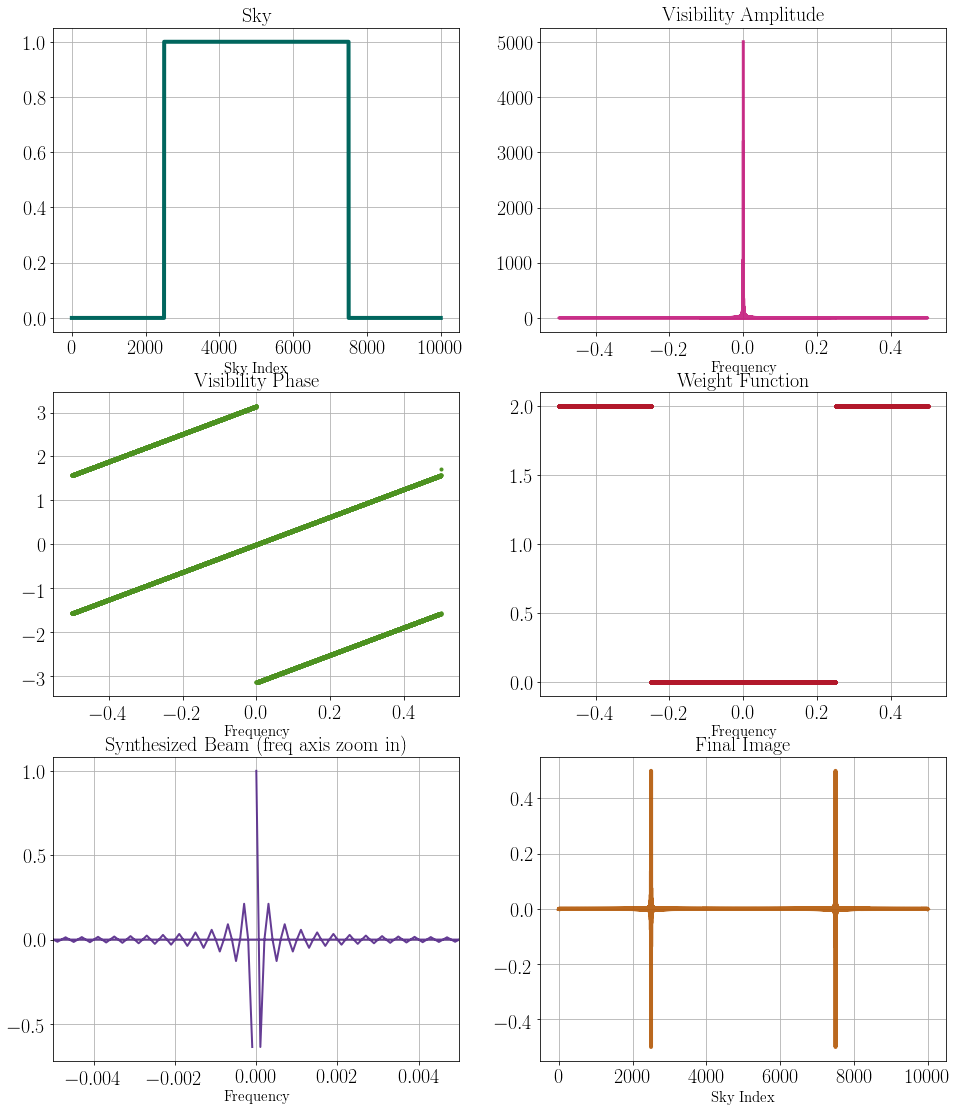

In [23]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3,freq = interferometer1D(sky1D_4b,weights_3,no_noise,True,0.,True)

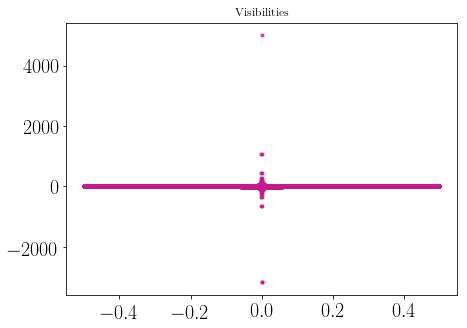

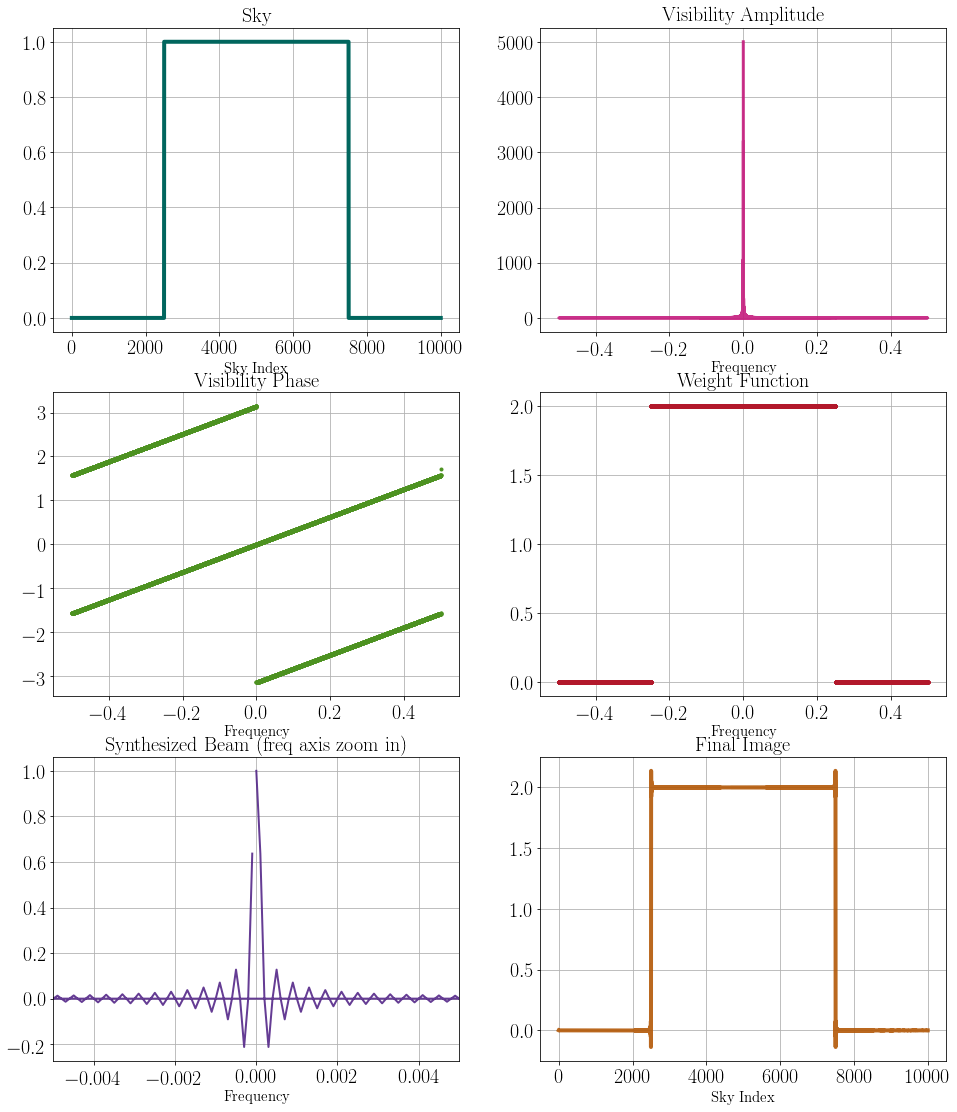

In [24]:
vis1D_3, phase_3, amp_3, image1D_3, synth_beam_3,freq = interferometer1D(sky1D_4b,weights_3b,no_noise,True,0.,True)

### How do the visibilities look, and how do they change as a function of the width of the tophat (and why?)? 
- The main difference between the visibilites between the two top-hat widths are the phases! The phases for the fatter tophat look more like what we see from the delta function example (clean lines wraping around at a predictable rate).  If you look at the thinner delta function, the phase lines look to be jumbled around a bit more, so it seems like the phase is less well defined for a thinner top-hat function.

- A note on the amplitudes:

From Fourier transform theory:
$$
\mathrm{rect}(t) \rightarrow \frac{\sin(\omega)}{\omega}
$$

So we know that if we are taking a fourier transform of a tophat, we expect a sinc function.... as this is exactly what we see!

### How does the image of the top-hat look depending on what information is present/missing?
- For the final image where no short baselines were present (only long baselines), it looks like the large scale information is missing.  The "bar" that connects the vertical peaks of the top-hat is missing.  This makes this image hard to distinguish between a top-hat function or 2 delta-functions (two seperate point sources in the sky).
- So obviously this means that the baselines present (long vs. short) directly impact what types of structures you are able to resolve.  From class we discussed that "Emission features larger than $\Delta\theta$ are resolved out, thus produce no output signal in the image".  Long vs. short baselines produce different $\Delta \theta$ (because this vector has to do with the baseline dotted with the direction of the source), and thus will resolve different structure scales.
- Also note that any edges in the image has the synthesized beam imprinted on it.  So every "corner" of the top-hat has the synthesized beam imprinted.

# Part 5 - Effects of Noise

### Let's start looking at the effects of noise in the visibilities. Create a sky with a delta function, and use a weighting that removes some of the shortest and longest baselines. Inject some noise into the visibilities by adding Gaussian random numbers (with some amplitude/width) at each grid point (note that noise should be hermitian, just like the data!). Comment on how the resulting image changes from the addition of noise. Also, commend on how the noise looks on small scales (adjacent pixels).

### Short baselines missing

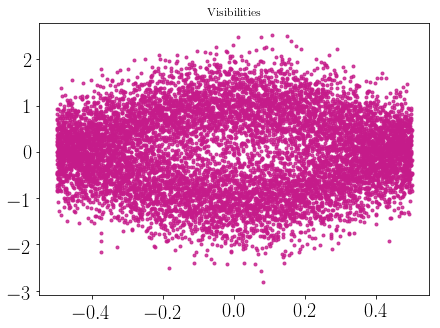

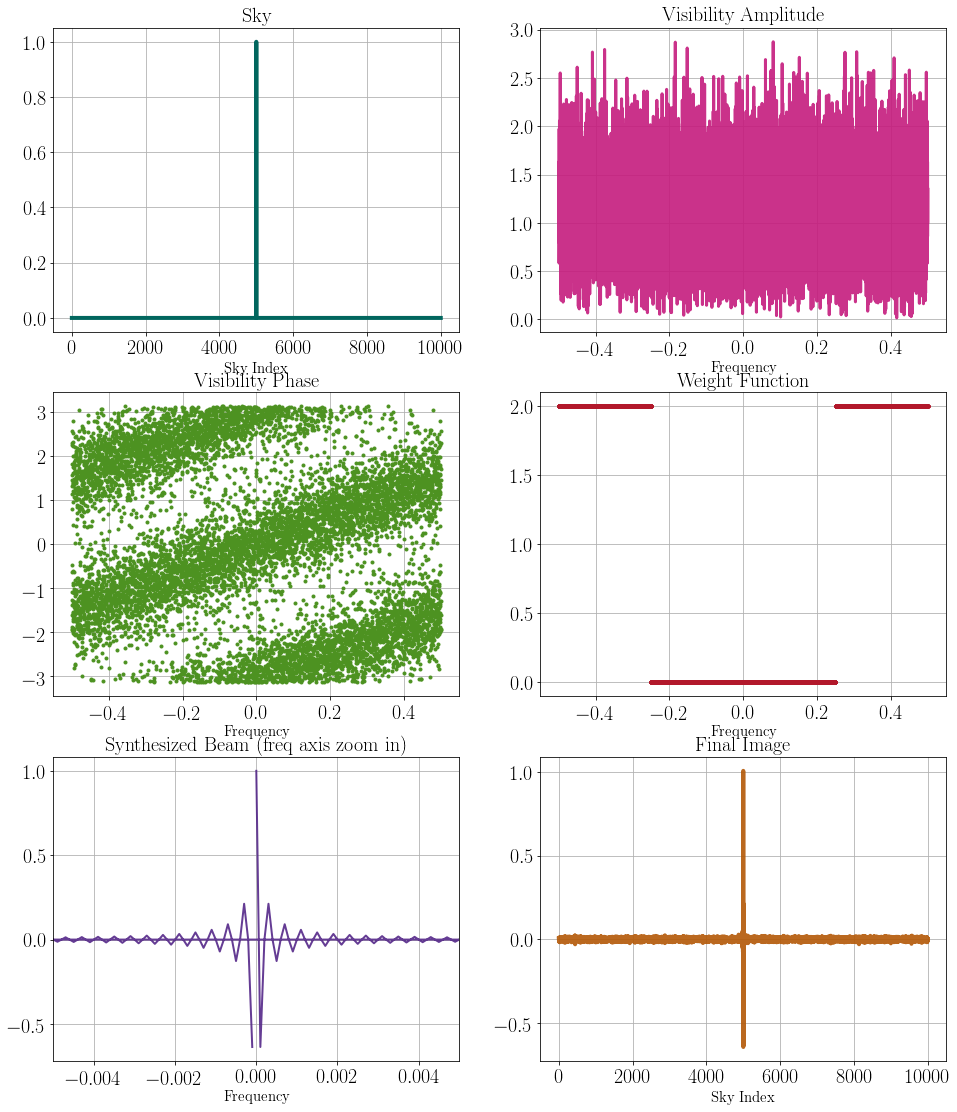

In [25]:
noise_lvl = .5
vis1D_5a, phase_5a, amp_5a, image1D_5a, synth_beam_5a,freq_5a = interferometer1D(sky1D_a,weights_3,noise_lvl,True,0.,True)

### Long Baselines Missing

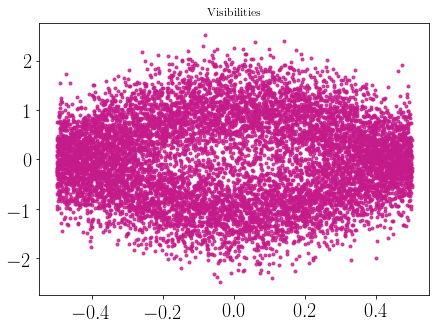

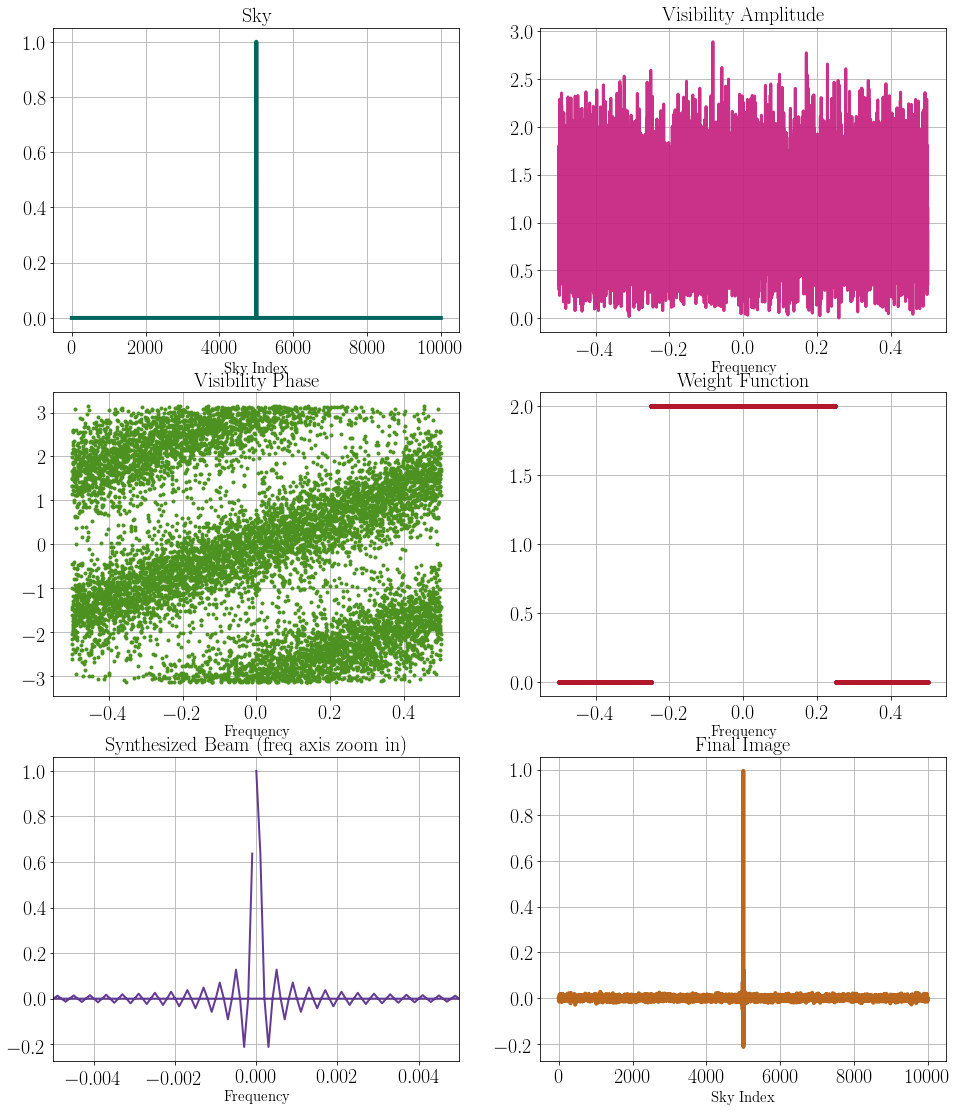

In [32]:
noise_lvl = .5
vis1D_5b, phase_5b, amp_5b, image1D_5b, synth_beam_5b,freq_5b= interferometer1D(sky1D_a,weights_3b,noise_lvl,True,0.,True)

### Looking at the effects on the final image on small scales

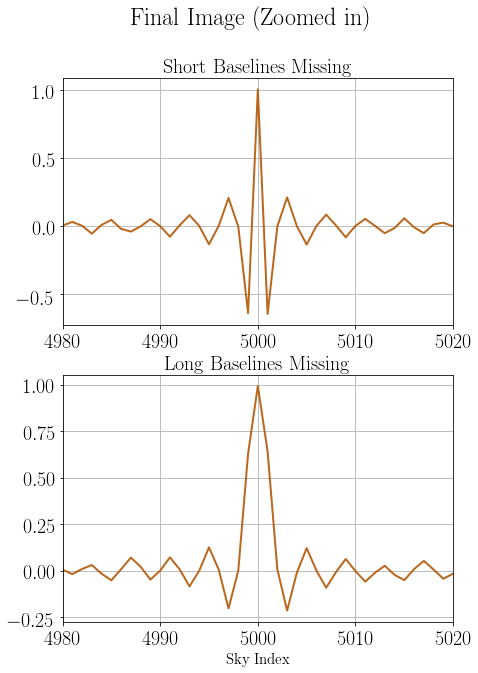

In [36]:
plt.figure(figsize=(7,10))
plt.subplot(211)
plt.suptitle(r'Final Image (Zoomed in)',fontsize=24)
plt.plot(image1D_5a,linewidth=2,c='#b35806',alpha=0.9)
plt.title(r'Short Baselines Missing',fontsize=20)
plt.xlim((4980,5020))
plt.tick_params(labelsize=20)
plt.grid()   
plt.subplot(212)
plt.plot(image1D_5b,linewidth=2,c='#b35806',alpha=0.9)
plt.title(r'Long Baselines Missing',fontsize=20)
plt.xlabel(r'Sky Index',fontsize=15)
plt.xlim((4980,5020))
plt.tick_params(labelsize=20)
plt.grid() 
plt.show()

### Comment on how the resulting image changes from the addition of noise. 

I noticed that most of this noise adds random power in the final image in regions where there was no power in the original sky image.

In therms of the visibilites, it obviously adds random scatter to the amplitude and phase.  But it doesnt change what the intrinsic slopes would be in the phase diagrams (whereas adding a phase error, as done below, does change this slope!)

### Also, commend on how the noise looks on small scales (adjacent pixels).

- Zooming into the crentral region of the final image we get what we expect from the experiments done above, see description from above sections and the zoom in plots from the cell above
- Otherwise, the noise on small scales look like random numbers +/- from the zero axis, symmetric about the central peak in the image.  This is expected (I think?) since I input random numbers, shouldnt the resulting noise in the background end up being random?

# Part 6
### Finally, let's look at phase errors (from imperfect calibration). Again, let's start with a delta-function source and weights that remove the shortest and longest baselines. Without changing the amplitudes, introduce a random phase error (by multiplying by exp(i*phase_error)), which can be a uniform distribution of some width (say, +-10 degrees to start with). Again, make sure the visibilities are still Hermitian. Look at how the image changes as a result. Experiment with different widths of the phase error distribution to see how things change.

### Removing the shortest baselines

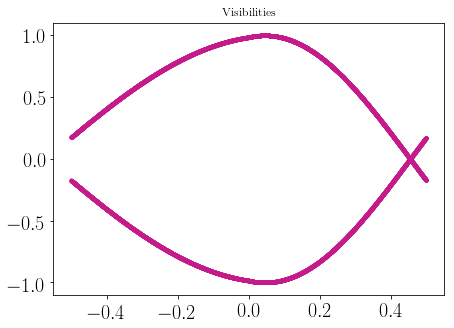

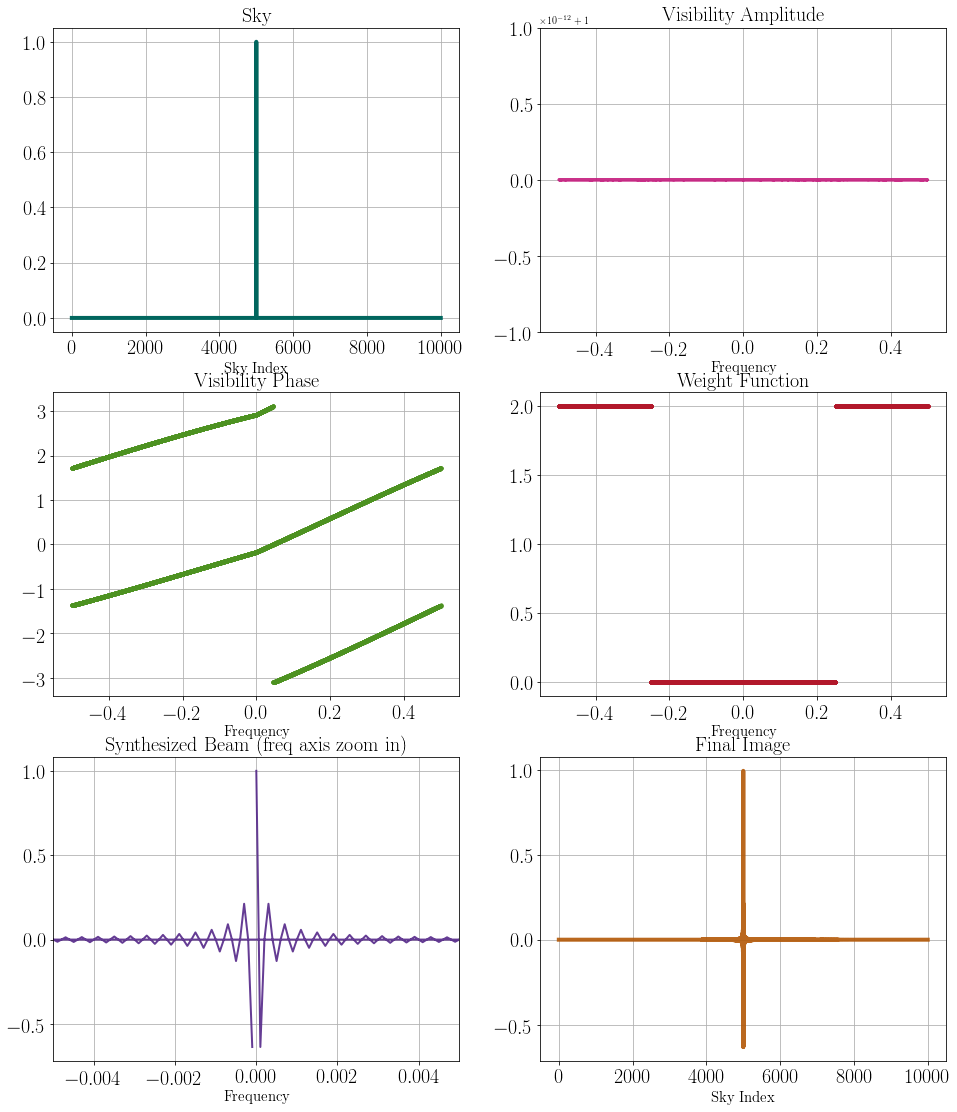

In [28]:
noise_lvl = 0.
phi_err =10.
vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3,noise_lvl,True,phi_err,True)

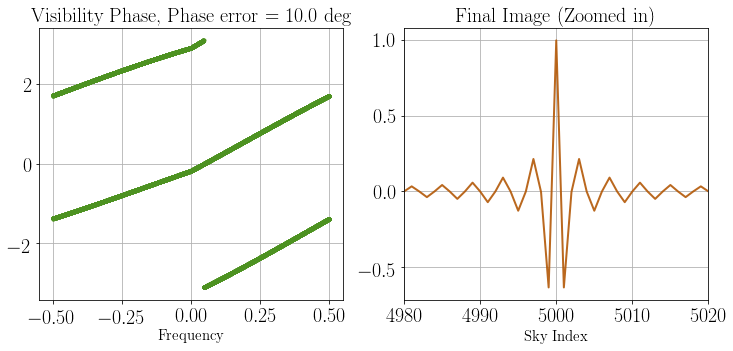

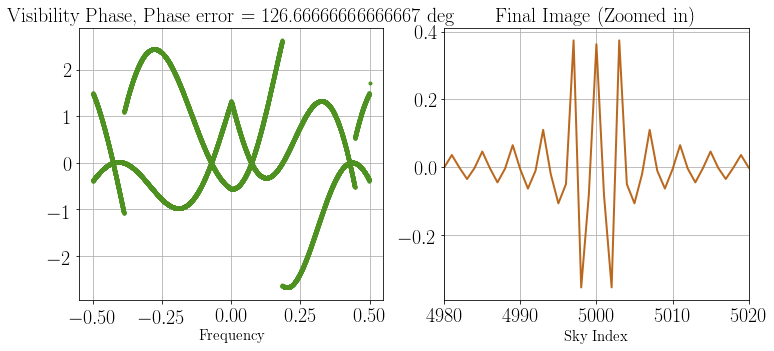

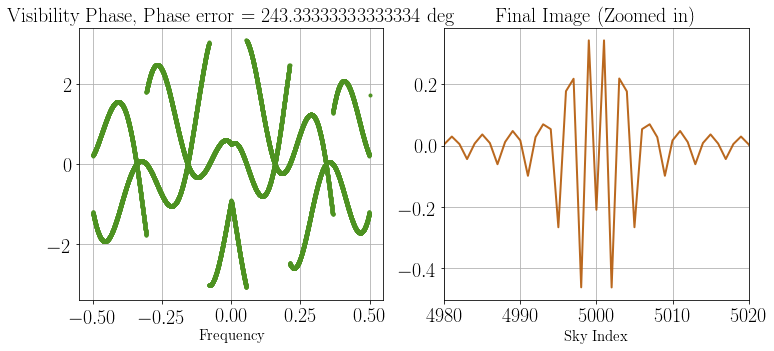

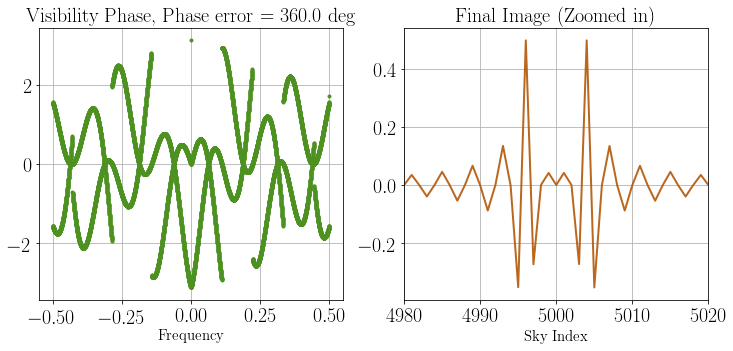

In [29]:
phi_err_vals = np.linspace(10,360,4)


for i in np.arange(0,len(phi_err_vals)):
    vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3,noise_lvl,False,phi_err_vals[i],False)
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title("Visibility Phase, Phase error = " + str(phi_err_vals[i]) + " deg",fontsize=20)
    plt.xlabel(r'Frequency',fontsize=15)
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.plot(freq,phase,'.',c='#4d9221')
    plt.subplot(122)
    plt.plot(image1D,linewidth=2,c='#b35806',alpha=0.9)
    plt.title(r'Final Image (Zoomed in)',fontsize=20)
    plt.xlabel(r'Sky Index',fontsize=15)
    plt.xlim((4980,5020))
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.show()

### Removing the longest baselines

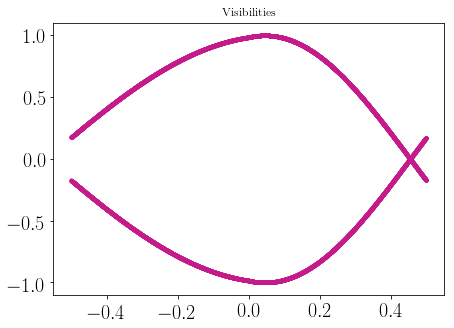

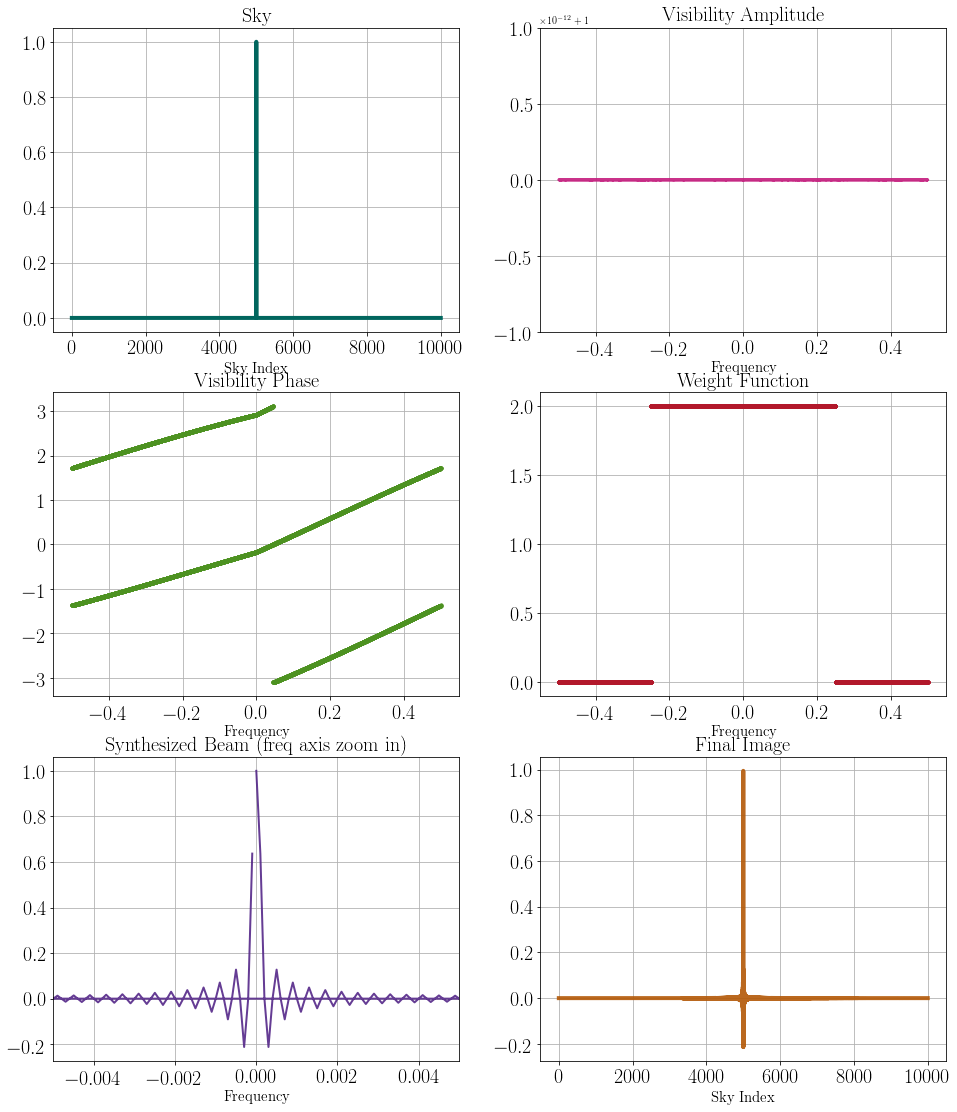

In [30]:
noise_lvl = 0.
phi_err =10.
vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3b,noise_lvl,True,phi_err,True)

Here I am going to loop through a few varying values of phase errors to better understand the effects on the image.

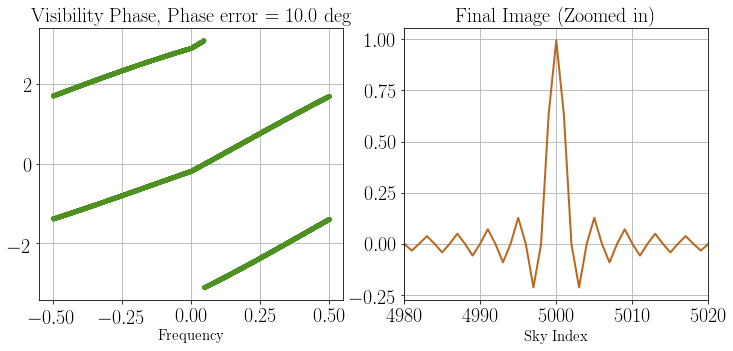

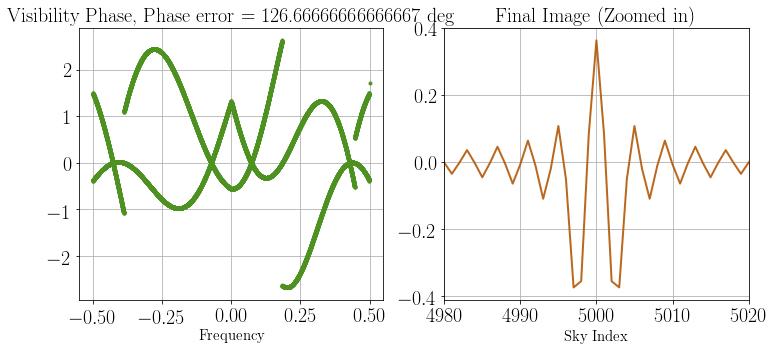

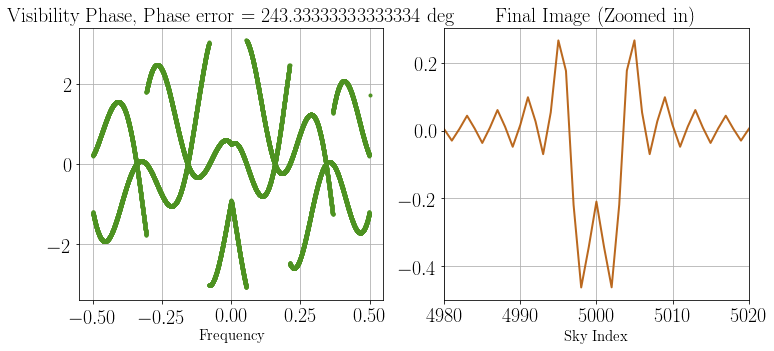

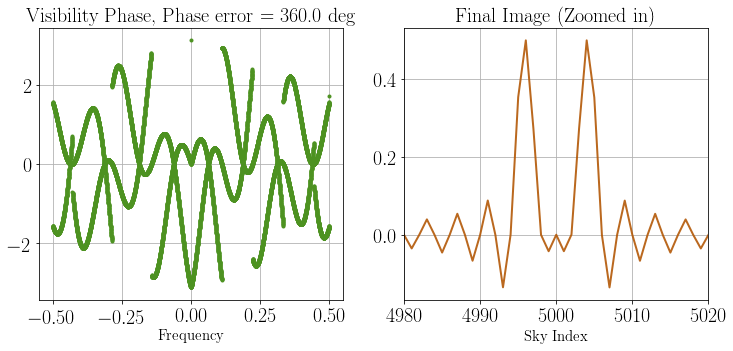

In [31]:
phi_err_vals = np.linspace(10,360,4)


for i in np.arange(0,len(phi_err_vals)):
    vis1D, phase, amp, image1D, synth_beam,freq = interferometer1D(sky1D_a,weights_3b,noise_lvl,False,phi_err_vals[i],False)
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title("Visibility Phase, Phase error = " + str(phi_err_vals[i]) + " deg",fontsize=20)
    plt.xlabel(r'Frequency',fontsize=15)
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.plot(freq,phase,'.',c='#4d9221')
    plt.subplot(122)
    plt.plot(image1D,linewidth=2,c='#b35806',alpha=0.9)
    plt.title(r'Final Image (Zoomed in)',fontsize=20)
    plt.xlabel(r'Sky Index',fontsize=15)
    plt.xlim((4980,5020))
    plt.tick_params(labelsize=20)
    plt.grid()
    plt.show()


#### A side note on how I chose to define the phi_errors:

Here I wasnt sure if in this problem it was wanted the phase error to be:

-10 ->10, on the LHS, then 10 -> -10 (so like cycling through -10 to 10 twice)

Or, if I was supposed to do the following:

-10 -> 10

I tried both, the second option seemed to show behaviour in the final image that was much more antisymmetric, whereas the first option (the one that I actually ended up using to make plots) showed more equal behaviour on both sides - it was symmetric.
I think that both options could be valid? They're both hermitian errors!

#### Comment on how the resulting image changes from the addition of noise. Also, commend on how the noise looks on small scales (adjacent pixels).

Most of the noise is actually concetrated on small scales (see how I had to zoom super far in on the plots where I loop through different phi errors).

We can see the peak of the delta function gets spread out on larger and larger scales. This would make sense because the phase has a direct correlation to the sky position of the object.  As we added larger phase errors you can see that the location on the sky of the delta function becomes more and more spread out - also seeming to spread out the height of the delta function (which I am interpreting to be the 'flux' being spread out over more pixels).

Another thing I can notice is that right beside the central pixel are symmetric *negative* features.  This is not present in the case with the *removed long baselines*. I remember a fact that Tessa told me back when I first used CASA (like 2 years ago! and when I didnt know anything about radio astronomy at all!) that a common sign of phase calibration errors are negative features or extra bright features symmetrically on either side of your bright source, so now I think this is showing that!

A difference between short baselines vs. long baselines missing:

It looks like that the case where short baselines are missing - finer variations within the central delta function (going from positive to negative) are able to be resolved, whereas with long baselines missing we arent able to see as much of the variations.
